### **Pareenita Atul Shirsath BE AI&DS - 49**
## **Aim - Design and Implement a Gaussian Mixture Model (GMM) for Outcome Prediction.**

Optimal number of components: 3
Accuracy: 98.33%


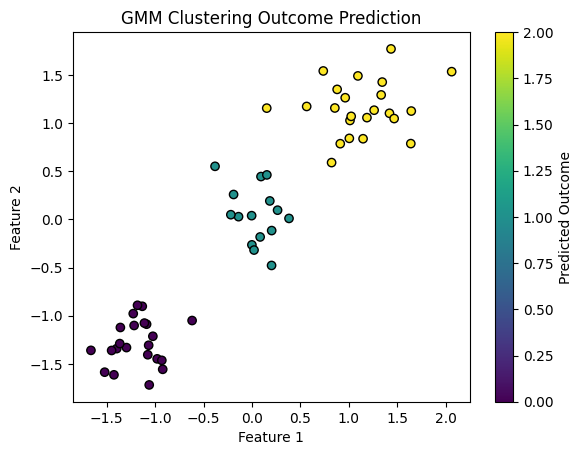

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import mode

np.random.seed(42)
X1 = np.random.normal(loc=[2, 2], scale=1, size=(100, 2))
X2 = np.random.normal(loc=[6, 6], scale=1, size=(100, 2))
X3 = np.random.normal(loc=[10, 10], scale=1, size=(100, 2))
X = np.vstack((X1, X2, X3))
y = np.array([0] * 100 + [1] * 100 + [2] * 100)  # Class labels

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

bic_scores = []
n_components_range = range(1, 10)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X_train)
    bic_scores.append(gmm.bic(X_train))

optimal_n = n_components_range[np.argmin(bic_scores)]
print(f"Optimal number of components: {optimal_n}")
gmm = GaussianMixture(n_components=optimal_n, covariance_type='full', random_state=42)
gmm.fit(X_train)

y_pred_train = gmm.predict(X_train)
y_pred_test = gmm.predict(X_test)

cluster_to_label = {}
for i in range(optimal_n):
    mask = (y_pred_train == i)
    if np.any(mask):  # Ensure mask is not empty
        mode_result = mode(y_train[mask], keepdims=True)
        cluster_to_label[i] = mode_result.mode[0] if isinstance(mode_result.mode, np.ndarray) else mode_result.mode
    else:
        cluster_to_label[i] = -1  # Assign a default label in case of empty cluster

y_pred_test_mapped = np.vectorize(cluster_to_label.get)(y_pred_test)

accuracy = accuracy_score(y_test, y_pred_test_mapped)
print(f"Accuracy: {accuracy * 100:.2f}%")

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test_mapped, cmap='viridis', marker='o', edgecolors='k')
plt.title("GMM Clustering Outcome Prediction")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Predicted Outcome")
plt.show()


Dataset Shape: (2149, 35)
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion

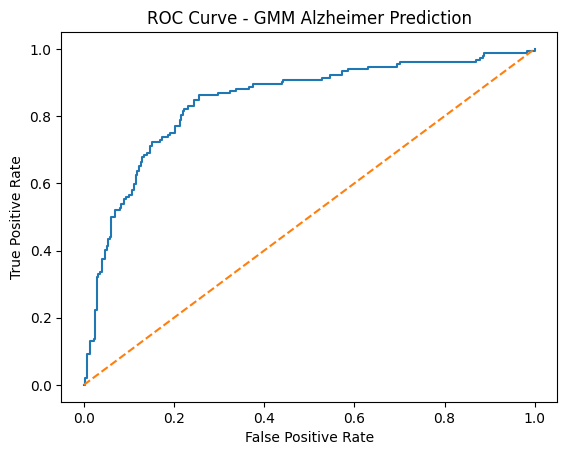

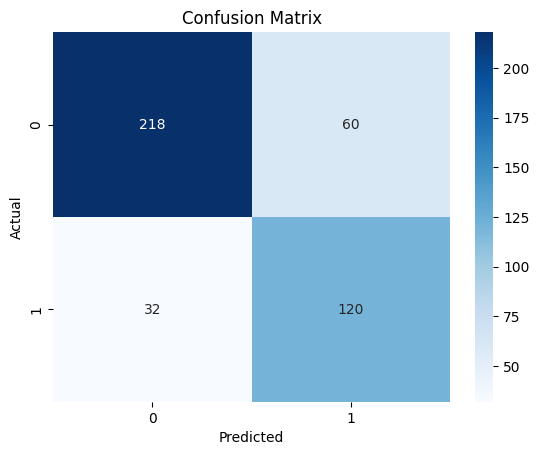


Sample Predictions:
Prediction: 1 | Probability: [0.10610282 0.89389718]
Prediction: 0 | Probability: [0.98157533 0.01842467]
Prediction: 1 | Probability: [0.01570079 0.98429921]
Prediction: 0 | Probability: [0.50533449 0.49466551]
Prediction: 1 | Probability: [0.00137988 0.99862012]


In [4]:
# =========================================
# Gaussian Mixture Model - Alzheimer's Prediction
# =========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# -----------------------------------------
# 1. Load Dataset
# -----------------------------------------
df = pd.read_csv("alzheimers_disease_data.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# -----------------------------------------
# 2. Drop Irrelevant Columns
# -----------------------------------------
df.drop(columns=["PatientID", "DoctorInCharge"], inplace=True)

# -----------------------------------------
# 3. Split Features & Target
# -----------------------------------------
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# -----------------------------------------
# 4. Feature Scaling
# -----------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------------------
# 5. Train-Test Split
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------------------
# 6. Train GMM for Each Class
# -----------------------------------------
classes = np.unique(y_train)
gmm_models = {}

for cls in classes:
    gmm = GaussianMixture(
        n_components=2,
        covariance_type="full",
        random_state=42
    )
    gmm.fit(X_train[y_train == cls])
    gmm_models[cls] = gmm

print("\nGMM Models Trained for Classes:", classes)

# -----------------------------------------
# 7. Prediction Function
# -----------------------------------------
def gmm_predict(X, gmm_models):
    predictions = []
    probabilities = []

    for x in X:
        scores = {cls: gmm.score_samples(x.reshape(1, -1))[0]
                  for cls, gmm in gmm_models.items()}

        predicted_class = max(scores, key=scores.get)
        predictions.append(predicted_class)

        probs = np.exp(list(scores.values()))
        probs = probs / np.sum(probs)
        probabilities.append(probs)

    return np.array(predictions), np.array(probabilities)

# -----------------------------------------
# 8. Predictions
# -----------------------------------------
y_pred, y_prob = gmm_predict(X_test, gmm_models)

# -----------------------------------------
# 9. Evaluation Metrics
# -----------------------------------------
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# -----------------------------------------
# 10. ROC-AUC Curve
# -----------------------------------------
roc_auc = roc_auc_score(y_test, y_prob[:, 1])
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GMM Alzheimer Prediction")
plt.show()

# -----------------------------------------
# 11. Confusion Matrix Visualization
# -----------------------------------------
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# -----------------------------------------
# 12. Sample Prediction Output
# -----------------------------------------
results = X_test[:5]
sample_pred, sample_prob = gmm_predict(results, gmm_models)

print("\nSample Predictions:")
for i in range(5):
    print(f"Prediction: {sample_pred[i]} | Probability: {sample_prob[i]}")
